In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from simulation import ForwardSimulation, BackwardSimulation


device = "cpu"

# Graph prediction algorithm

This notebook runs Multi-Agent Multi-Armed Bandit (MAMAB) games. It returns the history of choices each agent made, and the reward they gained at each turn after each forward simulation.

The code frames the output of the MAMAB games as a function of the Adjacency matrix, which is manually provided.

Forward_Simulation(Adjacency_matrix) = History

Using this as a frame, given a History matrix, we attempy to find the adjacency matrix as a function of the History.

### Goal
Find the unknown_function such that
    
unknown_function(History) = Adjacency_matrix

### Initial approach: 

Use Backpropagation to find the correct Adjacency matrix.


In [2]:
#Initialize a Forward Sim object
Fsim = ForwardSimulation(num_arms=5, num_agents=5, device=device, averaging_runs=10, max_epochs=100)

In [3]:
# Manually define an network
Adj = torch.zeros(5, 5, device=device)


#Run the forward sim and get the reward and choice history
reward_history, choice_history = Fsim.run_simulation(adjacency_matrix=Adj) 
print(f"{choice_history=}")

choice_history=tensor([[19.8000, 25.6000, 17.4000, 17.8000, 18.4000],
        [17.6000, 28.5000, 17.9000, 16.7000, 18.3000],
        [18.1000, 27.2000, 18.7000, 17.0000, 18.0000],
        [20.0000, 25.4000, 17.9000, 17.7000, 18.0000],
        [18.5000, 26.0000, 18.6000, 17.6000, 18.3000]], grad_fn=<DivBackward0>)


In [4]:
# Take a look at the arm_performance. Each row corresponds to an arm. The first column is the mean performance, 
#.... the second is the variance in performance

# To check if MAB alogirthm is correct, check if your agents are picking the arm with the highest mean!
Fsim.arm_performance

tensor([[0.7426, 0.6438],
        [0.9349, 0.4346],
        [0.6627, 0.7003],
        [0.6439, 0.3749],
        [0.7112, 0.0557]])

In [5]:
#Save the settings from the Forward sim.
state_dict = Fsim.save_state()

#Pass the settings to a new Backward sim.
Bsim = BackwardSimulation(state_dict=state_dict)

All settings succesfully loaded


In [6]:
loss_history = Bsim.train(reward_history, choice_history, train_epochs=1000)

Epoch 0, loss: 332.2127685546875
Epoch 1, loss: 280.583984375
Epoch 2, loss: 272.7895812988281
Epoch 3, loss: 280.57281494140625
Epoch 4, loss: 280.9151916503906
Epoch 5, loss: 252.3448028564453
Epoch 6, loss: 292.3223876953125
Epoch 7, loss: 230.6752166748047
Epoch 8, loss: 305.3871765136719
Epoch 9, loss: 340.2768249511719
Epoch 10, loss: 264.098388671875
Epoch 11, loss: 258.7359619140625
Epoch 12, loss: 279.82159423828125
Epoch 13, loss: 317.06243896484375
Epoch 14, loss: 322.26641845703125
Epoch 15, loss: 296.919189453125
Epoch 16, loss: 189.36160278320312
Epoch 17, loss: 264.2327880859375
Epoch 18, loss: 260.7192077636719
Epoch 19, loss: 286.647216796875
Epoch 20, loss: 326.76641845703125
Epoch 21, loss: 273.8832092285156
Epoch 22, loss: 277.231201171875
Epoch 23, loss: 235.7392120361328
Epoch 24, loss: 260.3879699707031
Epoch 25, loss: 285.7391662597656
Epoch 26, loss: 299.2112121582031
Epoch 27, loss: 280.25360107421875
Epoch 28, loss: 250.03277587890625
Epoch 29, loss: 289.3160

KeyboardInterrupt: 

### The training seems to have no effect!

This might be because of two reasons:

- Bad MAMAB algorithm
    There is no simple, convex correlation between adjacency matrix and histories. 

- Sub optimal loss function
    The loss functions is not able to capture the difference in agent's choices effectively.

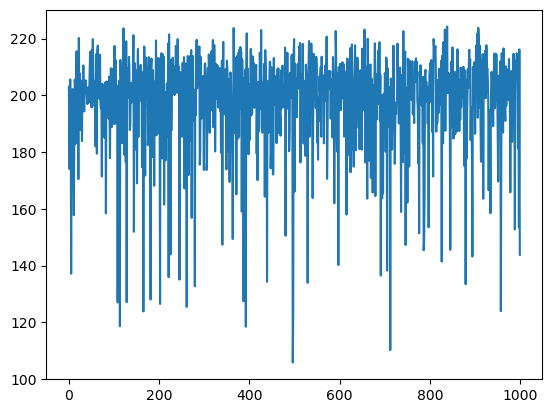

In [ ]:
plt.plot(loss_history)

### Predicted Graph!

In [25]:
Bsim.adjacenyM

tensor([[0.9860, 0.1872, 0.3526, 0.4282, 0.5042],
        [0.1366, 0.2702, 0.2294, 0.0993, 0.6687],
        [0.0660, 0.1057, 0.9379, 0.7590, 0.5537],
        [0.6462, 0.1479, 0.2104, 0.5259, 0.7524],
        [0.0104, 0.8820, 0.8989, 0.9455, 0.9148]], requires_grad=True)